# F24_MDSSB-MET-01-B_Data Science Tools in Python

# Session 4: Linear Models & Principal Component Analysis
## ... with Python, and NumPy/Pandas

##### Recommended Reading: 

##### 1. Python Data Science Handbook
##### URL: https://jakevdp.github.io/PythonDataScienceHandbook/
##### Chapter 5, Machine Learning - sub-chapters on Linear Regression and Principal Component Analysis 

##### 2. An Introduction to Statistical Learning - with Applications in Python
##### URL: https://www.statlearning.com/
##### for statsmodels package implementation of OLS regression

##### 3. Introductory Econometrics - A Modern Approach
##### by Jeffrey M. Woolridge
##### Part 1: Regression Analysis with Cross-Sectional Data (for theory, assumptions, and practical considerations)


##### Armin Müller, Constructor University

Machine Learning is quite well-developed in Python. There are also solutions for analytical statistics, but they are not as consolidated and sophisticated as those in R. 


# 1. Preparations: 

## 1.1 Packages

In [1]:
# NumPy
import numpy as np

In [2]:
# Pandas
import pandas as pd 
pd.options.mode.copy_on_write = True
pd.__version__ 

'2.2.2'

In [3]:
# Plots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
mpl.__version__ # should be mature

'3.9.1'

In [4]:
# Import Seaborn
import seaborn as sns
sns.__version__  # Beta Version

'0.13.2'

In [5]:
# Set a theme for the document
sns.set_theme(context='notebook',
              style = 'whitegrid',
              palette = 'hls', # you might want to do it for each plot separately 
              font='Times New Roman',
              font_scale = 0.8 # adjust the font size
              )

In [6]:
# Scikit-Learn
import sklearn
from sklearn.metrics import r2_score, mean_squared_error
sklearn.__version__

'1.5.1'

In [7]:
# Statmodels package for statistical analysis
import statsmodels.api as sm
sm.__version__  # Beta Version

'0.14.2'

In [10]:
# Install ISLP if necessary
#%pip install ISLP

Defaulting to user installation because normal site-packages is not writeable
  Using cached ISLP-0.4.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached lifelines-0.29.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached pygam-0.9.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
Using cached ISLP-0.4.0-py3-none-any.whl (3.6 MB)
Using cached lifelines-0.29.0-py3-none-any.whl (349 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
Using cached pygam-0.9.1-py3-none-any.whl (522 kB)
Using cached scipy-1.11.4-cp39-cp39-macosx_10_9_x86_64.whl (37.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.1
    Uninstalling numpy-2.0.1:
      Successfully uninstalled numpy-2.0.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninsta

In [ ]:
# Install skimpy if necessary
#%pip install skimpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1.2 Data preparation and overview

In [8]:
# import ISLP package with the dataset
import ISLP
ISLP.__version__ # Beta Version

'0.4.0'

In [9]:
# import Hitters data from the ISLP package
from ISLP import load_data
Hitters = load_data('Hitters')

There are multiple options of getting an overview of the data:

In [10]:
# Get the dimensions of the dataframe
Hitters.shape

(322, 20)

In [11]:
# Check the types of variables and number of observations
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

In [14]:
# Transpose the dataset to have variable names in the lines and see the first observations
Hitters.transpose()

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
AtBat,293,315,479,496,321,594,185,298,323,401,...,387,580,408,593,221,497,492,475,573,631
Hits,66,81,130,141,87,169,37,73,81,92,...,124,207,117,172,53,127,136,126,144,170
HmRun,1,7,18,20,10,4,1,0,6,17,...,1,8,11,22,2,7,5,3,9,9
Runs,30,24,66,65,39,74,23,24,26,49,...,67,107,66,82,21,65,76,61,85,77
RBI,29,38,72,78,42,51,8,24,32,66,...,27,71,41,100,23,48,50,43,60,44
Walks,14,39,76,37,30,35,21,7,8,65,...,36,105,34,57,22,37,94,52,78,31
Years,1,14,3,11,2,11,2,3,2,13,...,7,5,1,1,8,5,12,6,8,11
CAtBat,293,3449,1624,5628,396,4408,214,509,341,5206,...,1775,2778,408,593,1063,2703,5511,1700,3198,4908
CHits,66,835,457,1575,101,1133,42,108,86,1332,...,506,978,117,172,283,806,1511,433,857,1457
CHmRun,1,69,63,225,12,19,1,0,6,253,...,6,32,11,22,15,32,39,7,97,30


In [16]:
# Get summary statistics for the quantitative variables variables
Hitters.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


We can also get more sophisticated overviews of the data, but that requires either additional packages (often at beta stage) or programming our own functions.

In [17]:
# Use the skim function
from skimpy import skim
skim(Hitters)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 322    │ │ int64       │ 16    │ │ League                │                                │
│ │ Number of columns │ 20     │ │ category    │ 3     │ │ Division              │                                │
│ └───────────────────┴────────┘ │ float64     │ 1     │ │ NewLeague             │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ AtBat          │   0 │       0 │   380.9 │   153.4 │     16 │   255.2 │  379.5 │    512 │    687 │ ▁▇▇▆▇▅  │  │
│ │ Hits           │   0 │       0 │     101 │   46.45 │      1 │      64 │     96 │    137 │    238 │ ▂▇▇▆▃▁  │  │
│ │ HmRun          │   0 │       0 │   10.77 │   8.709 │      0 │       4 │      8 │     16 │     40 │  ▇▆▃▂▁  │  │
│ │ Runs           │   0 │       0 │   50.91 │   26.02 │      0 │   30.25 │     48 │     69 │    130 │  ▃▇▆▅▃  │  │
│ │ RBI            │   0 │       0 │   48.03 │   26.17 │      0 │      28 │     44 │  64.75 │    121 │ ▃▇▇▃▂▁  │  │
│ │ Walks          │   0 │       0 │   38.74 │   21.64 │      0 │      22 │     35 │     53 │    105 │ ▃▇▆▃▂▁  │  │
│ │ Years          │   0 │       0 │   7.444 │   4.926 │      1 │       4 │      6 │     11 │     24 │  ▇▇▃▃▁  │  │
│ │ CAtBat         │   0 │       0 │    2649 │    2324 │     19 │   816.8 │   1928 │   3924 │  14050 │  ▇▃▂▁   │  │
│ │ CHits          │   0 │       0 │   717.6 │   654.5 │      4 │     209 │    508 │   1059 │   4256 │   ▇▃▂   │  │
│ │ CHmRun         │   0 │       0 │   69.49 │   86.27 │      0 │      14 │   37.5 │     90 │    548 │   ▇▁▁   │  │
│ │ CRuns          │   0 │       0 │   358.8 │   334.1 │      1 │   100.2 │    247 │  526.2 │   2165 │   ▇▃▂   │  │
│ │ CRBI           │   0 │       0 │   330.1 │   333.2 │      0 │   88.75 │  220.5 │  426.2 │   1659 │  ▇▃▁▁   │  │
│ │ CWalks         │   0 │       0 │   260.2 │   267.1 │      0 │   67.25 │  170.5 │  339.2 │   1566 │   ▇▂▁   │  │
│ │ PutOuts        │   0 │       0 │   288.9 │   280.7 │      0 │   109.2 │    212 │    325 │   1378 │ ▇▅▁▁ ▁  │  │
│ │ Assists        │   0 │       0 │   106.9 │   136.9 │      0 │       7 │   39.5 │    166 │    492 │ ▇▂▁▁▁▁  │  │
│ │ Errors         │   0 │       0 │    8.04 │   6.368 │      0 │       3 │      6 │     11 │     32 │  ▇▅▂▂▁  │  │
│ │ Salary         │  59 │   18.32 │   535.9 │   451.1 │   67.5 │     190 │    425 │    750 │   2460 │   ▇▅▂   │  │
│ └────────────────┴─────┴─────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━

We can get an equivalent of the glimpse() function in R relatively easily.

Note: the f-string allows us to insert code expressions (in curly braces {}) into a string.\
f"Rows: {df.shape[0]}" will create a string that starts with "Rows:" and then calls the number of rows from the Pandas dataframe.\
f"$ {col} <{df[col].dtype}> {df[col].head().values}" will create a string with the column name, the data type, and the first few values.

In [21]:
def glimpse(df): # the df represents a Pandas dataframe
    print(f"Rows: {df.shape[0]}") # print the number of rows
    print(f"Columns: {df.shape[1]}") # print the number of columns
    for col in df.columns: # Loop over the columns
        print(f"$ {col} <{df[col].dtype}> {df[col].head().values}")

In [22]:
glimpse(Hitters)

Rows: 322
Columns: 20
$ AtBat <int64> [293 315 479 496 321]
$ Hits <int64> [ 66  81 130 141  87]
$ HmRun <int64> [ 1  7 18 20 10]
$ Runs <int64> [30 24 66 65 39]
$ RBI <int64> [29 38 72 78 42]
$ Walks <int64> [14 39 76 37 30]
$ Years <int64> [ 1 14  3 11  2]
$ CAtBat <int64> [ 293 3449 1624 5628  396]
$ CHits <int64> [  66  835  457 1575  101]
$ CHmRun <int64> [  1  69  63 225  12]
$ CRuns <int64> [ 30 321 224 828  48]
$ CRBI <int64> [ 29 414 266 838  46]
$ CWalks <int64> [ 14 375 263 354  33]
$ League <category> ['A', 'N', 'A', 'N', 'N']
Categories (2, object): ['A', 'N']
$ Division <category> ['E', 'W', 'W', 'E', 'E']
Categories (2, object): ['E', 'W']
$ PutOuts <int64> [446 632 880 200 805]
$ Assists <int64> [33 43 82 11 40]
$ Errors <int64> [20 10 14  3  4]
$ Salary <float64> [  nan 475.  480.  500.   91.5]
$ NewLeague <category> ['A', 'N', 'A', 'N', 'N']
Categories (2, object): ['A', 'N']


We discussed the variables (naming scheme and units) in a previous session.\
Salary is the 1987 annual salary on opening day in thousands of dollars.\
HmRun is the number of home runs in 1986.\
CHmRun is the number of home runs during his career.

Let's check for any missing values:

In [23]:
# Let's check for missing values
Hitters.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

59 observations of the salary variable are missing.\
We will try and predict the salaries of those players, assuming salaries depend on performance and career track.\
First, we create a dataset for predictions with all the observations where salary is missing. To be on the safe side, use the .copy() function.

In [12]:
#  Make a separate set for prediction of unknown values
Hit_pred = Hitters[Hitters['Salary'].isna()].copy()
Hit_pred

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


Second, we create a dataset for Machine learning with the core variable of interest.
In Python, it is conventional to separate X and y early on, so for X, we drop Salary, the 3 categorical variables, as well as variables for which we do not have both 1986 values and cumulative values for the entire career. Subsequently, we save y in a separate object.

In [13]:
# get the predictors of interest for us ...
X_Hit = Hitters[Hitters['Salary'].notna()].drop(labels = ['Salary', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'], axis = 'columns').copy()
X_Hit

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
1,315,81,7,24,38,39,14,3449,835,69,321,414,375
2,479,130,18,66,72,76,3,1624,457,63,224,266,263
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354
4,321,87,10,39,42,30,2,396,101,12,48,46,33
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875
319,475,126,3,61,43,52,6,1700,433,7,217,93,146
320,573,144,9,85,60,78,8,3198,857,97,470,420,332


In [14]:
# ... and the response y
y_Hit = Hitters['Salary'][Hitters['Salary'].notna()].copy()
y_Hit

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

Now we split both x and y into training and test data. We have a rather small dataset, to we need a comparatively high share of data in the training dataset to create accurate forecasts. Here, we choose a 80%/20% split, i.e. 80% training data and 20% test data.


In [15]:
# Train/Test Split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_Hit, y_Hit,
                                                test_size = 0.2, # split size
                                                random_state=1) # set a seed for reproducibility

In [93]:
Xtest

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
126,282,78,13,37,51,29,5,1649,453,73,211,280,138
13,239,60,0,30,11,22,6,1941,510,4,309,103,207
207,490,148,14,64,78,49,13,3400,1000,113,445,491,301
221,576,167,8,89,49,57,4,822,232,19,132,83,79
68,521,142,20,67,86,45,4,815,205,22,99,103,78
315,593,172,22,82,100,57,1,593,172,22,82,100,57
277,530,159,3,82,50,47,6,1619,426,11,218,149,163
212,209,54,3,25,14,12,1,209,54,3,25,14,12
107,566,154,22,76,84,43,14,6100,1583,131,743,693,300
159,616,163,27,83,107,32,3,1437,377,65,181,227,82


# 2. Inspect the data

Let's inspect the data more thoroughly. First we want to take a look at the response.
We are dealing with a metric variable, so why not make a histogram.

Text(1, -0.15, 'Data taken from ISLP package.')

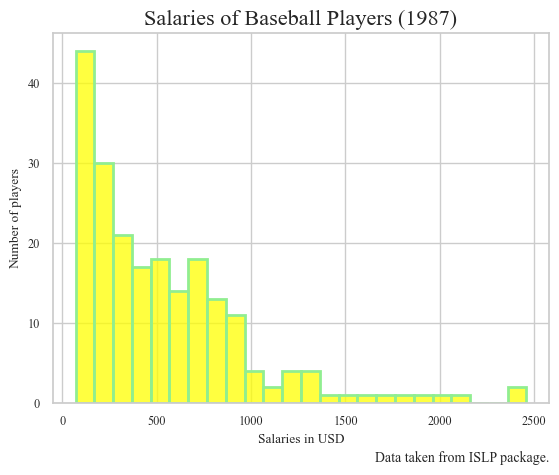

In [28]:
# Histogram Baseball salaries
Plot_2 = sns.histplot(ytrain, 
                      binwidth=100, 
                      color='yellow', edgecolor='lightgreen', linewidth = 2)
Plot_2.set(ylabel ='Number of players',
           xlabel ='Salaries in USD')
Plot_2.set_title(label = "Salaries of Baseball Players (1987)", fontsize = 16)
plt.text(1, -0.15, 'Data taken from ISLP package.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

This distribution is skewed, which often happens with count data and monetary data. This can cause problems for statistical inference (not our primary concern here). A common way to deal with this is to take the log of the variable.

Text(1, -0.15, 'Data taken from ISLP package.')

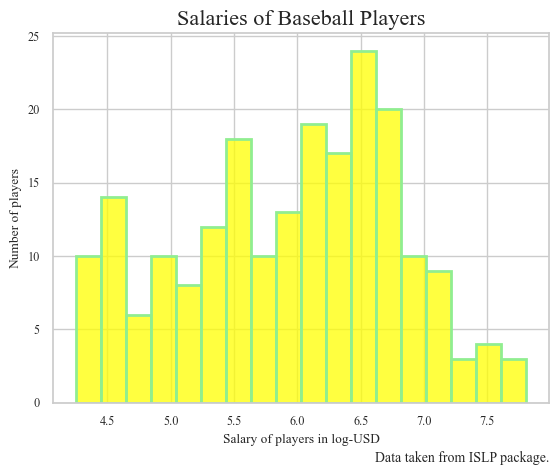

In [29]:
# Plot the logged y
Plot_2 = sns.histplot(np.log(ytrain), 
                      binwidth=0.2,  # you need much smaller binwidth
                      color='yellow', edgecolor='lightgreen', linewidth = 2)
Plot_2.set(# title = 'Distance in miles', # comes out too small
           ylabel ='Number of players',
           xlabel ='Salary of players in log-USD')
Plot_2.set_title(label = "Salaries of Baseball Players", fontsize = 16)
plt.text(1, -0.15, 'Data taken from ISLP package.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

Then we want to get an overview of the remaining variables.\
The pairplot function in Seaborn allows us to get a glimpse at all the relevant distributions and relationships at once.\
Be aware that you should not look at the test data before you machine learning model is completed.

For the pairplot, we need a dataset that includes both X and y.

In [30]:
# Combine Xtrain and ytrain into a single DataFrame
Xtrain_plot = Xtrain
Xtrain_plot['Salary'] = pd.Series(ytrain)

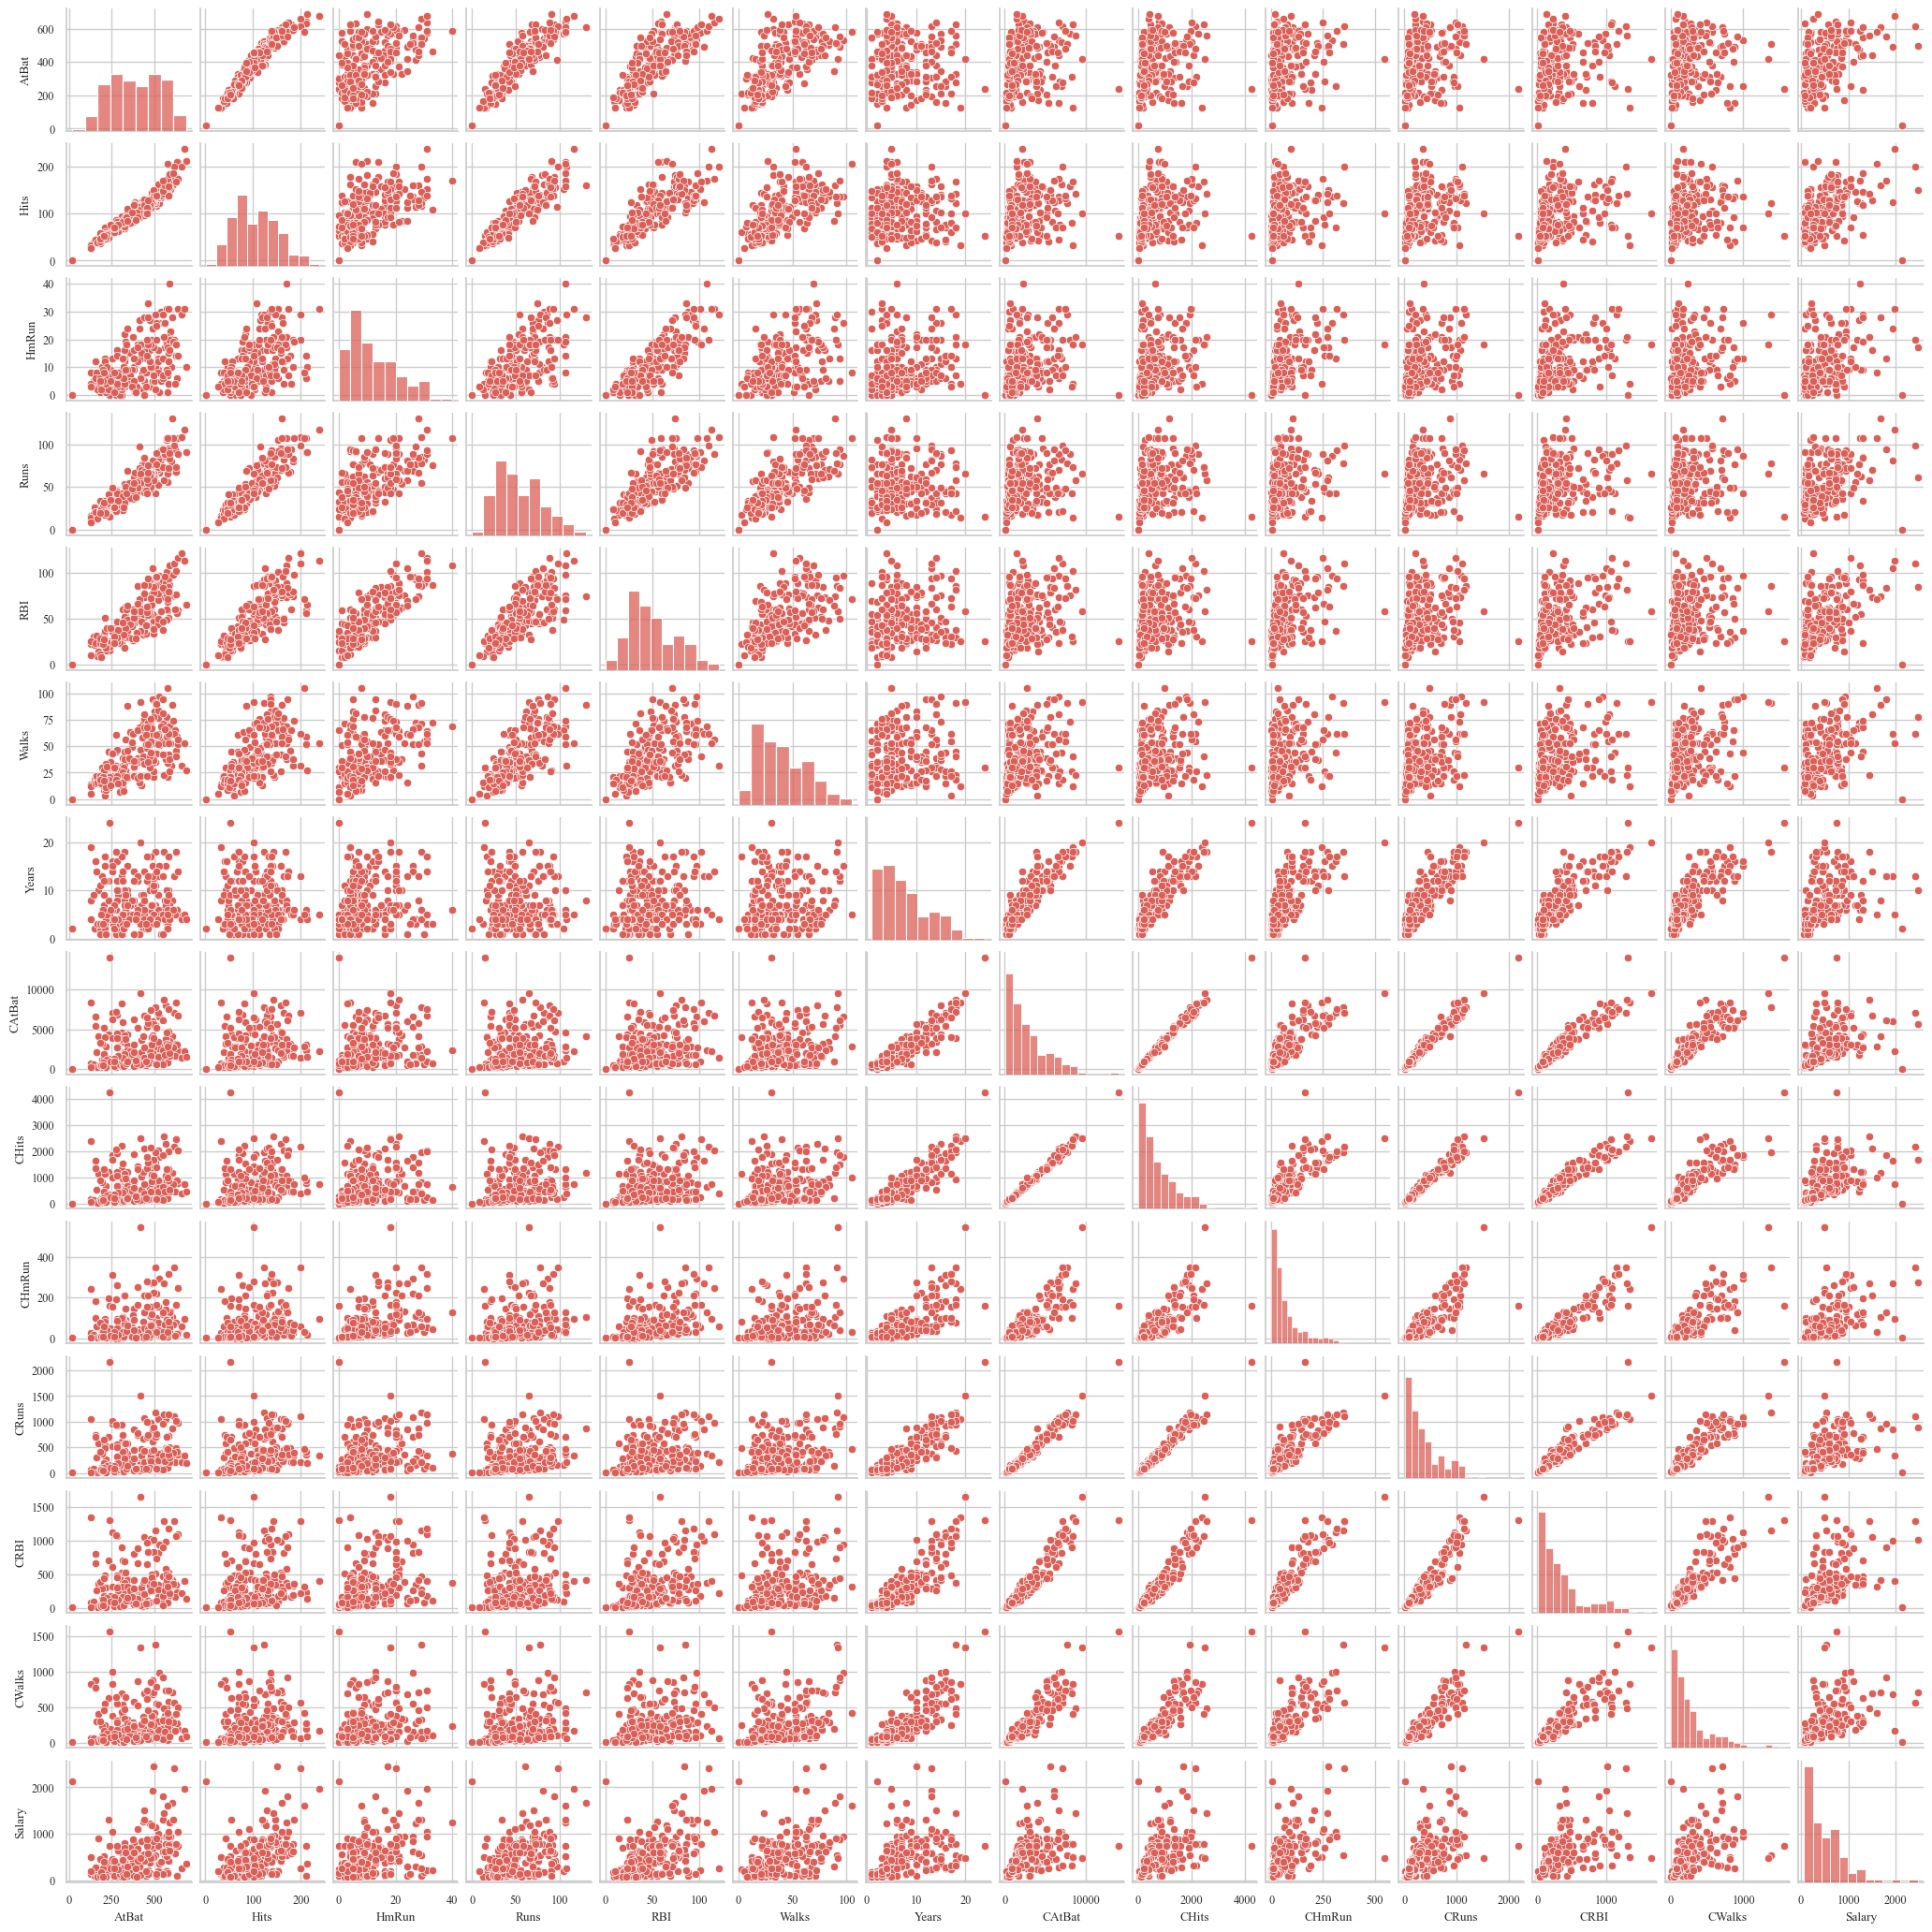

In [31]:
# Create a pairplot
sns.pairplot(Xtrain_plot, height=1.5)


A pairplot with all the variables is pretty crowded. We can also further narrow down the variables we want to inspect:

In [32]:
# select a subset of the variables
Xtrain_plot2 = Xtrain_plot[['Salary', 'CHmRun', 'Years', 'CRuns', 'HmRun', 'Runs']]
Xtrain_plot2

,Salary,CHmRun,Years,CRuns,HmRun,Runs
272,100.0,100,6,204,29,54
262,191.0,16,6,128,5,42
23,600.0,67,6,242,16,60
142,1300.0,194,12,702,9,34
297,245.0,42,6,129,10,21
...,...,...,...,...,...,...
255,250.0,12,6,102,5,35
313,1600.0,32,5,474,8,107
95,595.0,41,12,287,13,54
289,250.0,9,4,83,1,26


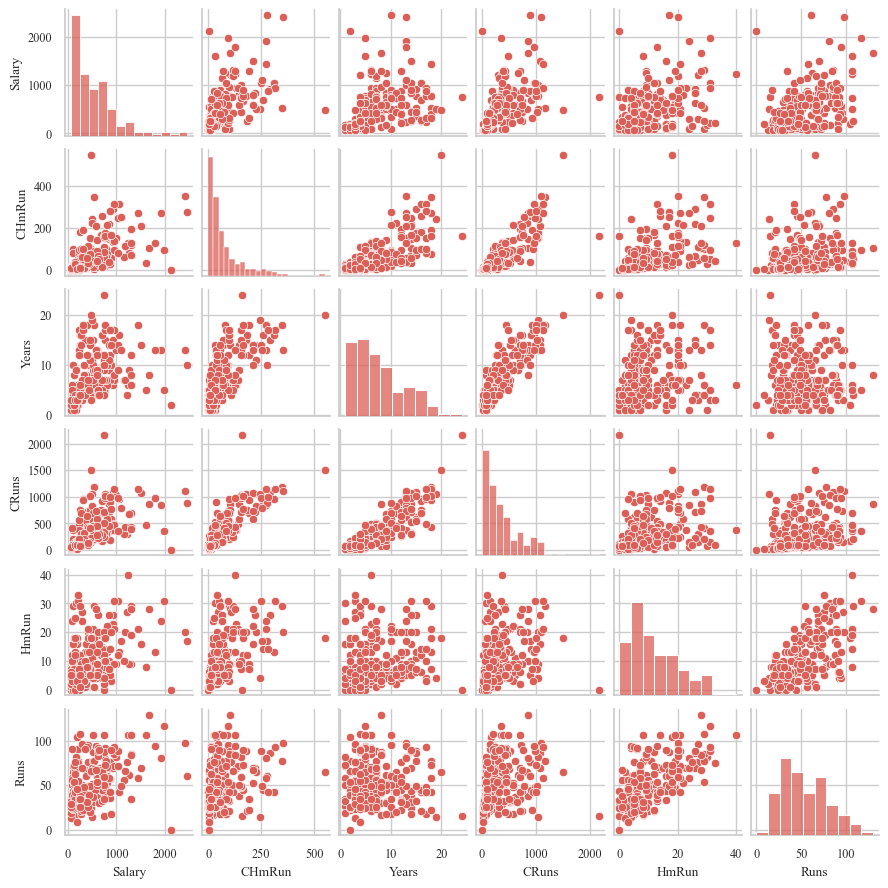

In [53]:
# Create a pairplot with a selection of variables
sns.pairplot(Xtrain_plot2, height=1.5)

This plot provides a number of important distributions and relationships at a glance, without being overly crowded.\
The histograms in the diagonal show us that many of the variables have a skewed distribution.\
Some of the variables feature strong correlation, which is visible in the scatter plots when the points are oriented towards a diagonal. For example, the Cumulative Number of Runs, the Cumulative Number of Home Runs, and the Years of career are strongly correlated. This insight appears rather plausible.\

Skewed distributions can decrease the performance of ordinary least-squares regression.\
How would those distributions and relationships look with log-transformed variables? We can easily plot it, using the numpy log (np.log()) function.

/Users/arminmuller/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


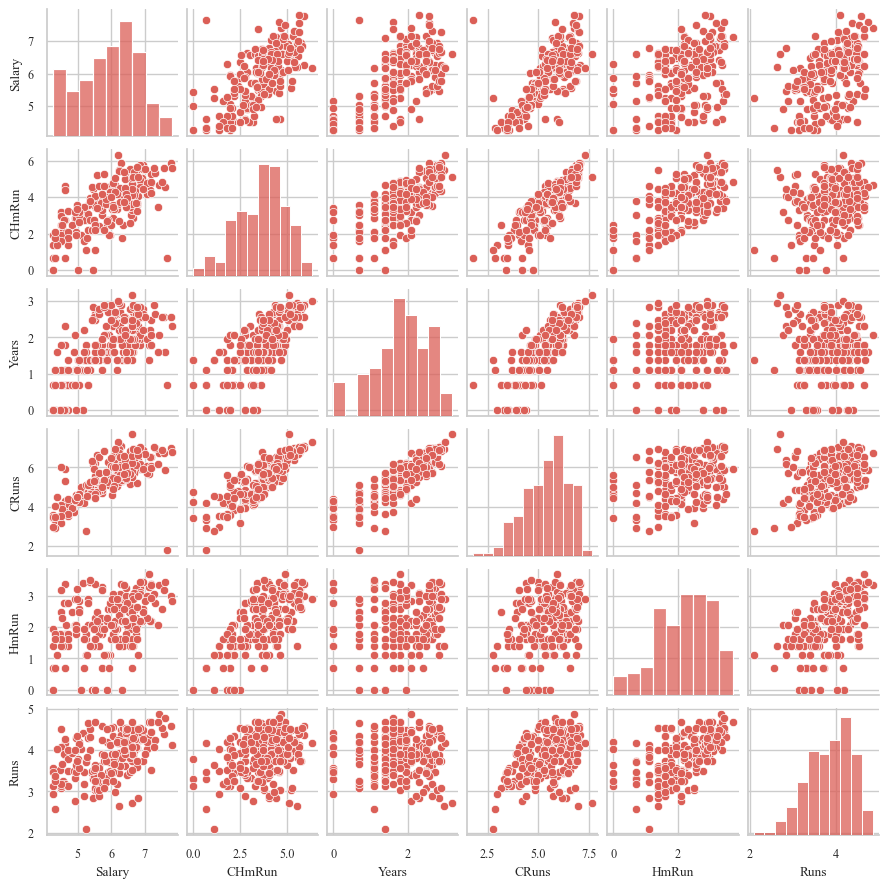

In [33]:
# pairplot with log-transformed variables
sns.pairplot(np.log(Xtrain_plot2), height=1.5)

Another option with pairplots is to assign the dependent variable to the color argument 'hue'. This will give us a hint at the relationships of the variable combinations to the dependent variable in the scatter plots. However, this comes at a cost, because the histograms become a lot less informative. These plots are probably more suitable for internal consideration than for a report.

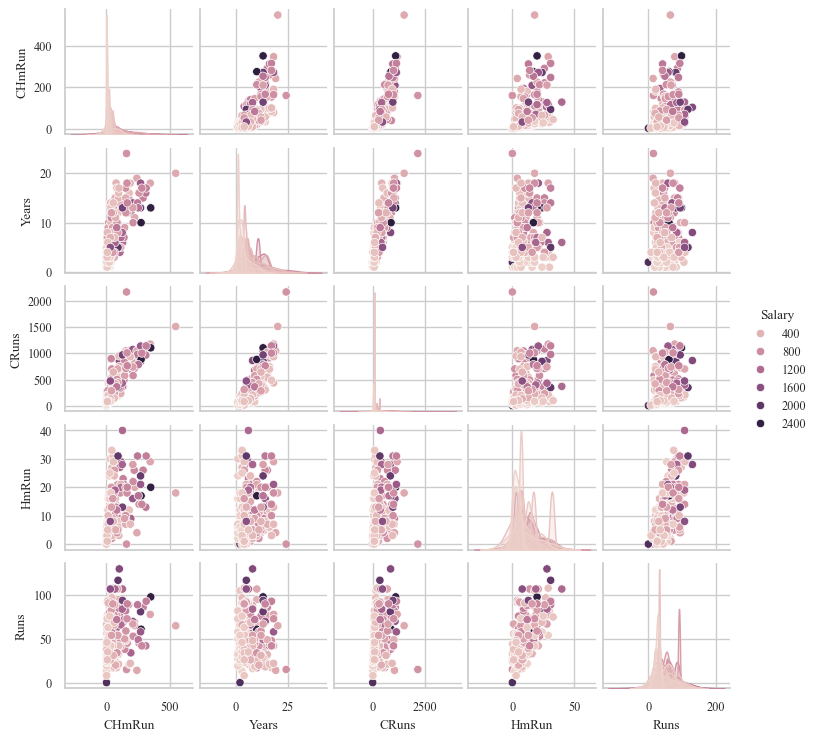

In [56]:
# Create a pairplot with a selection of variables
sns.pairplot(Xtrain_plot2, hue = 'Salary', height=1.5)

We can do the same with the log-transformed variables. In many of the scatter plots, the darker points are now more concentrated in the right or upper right part of the plot, indicating a positive correlation with Salary.

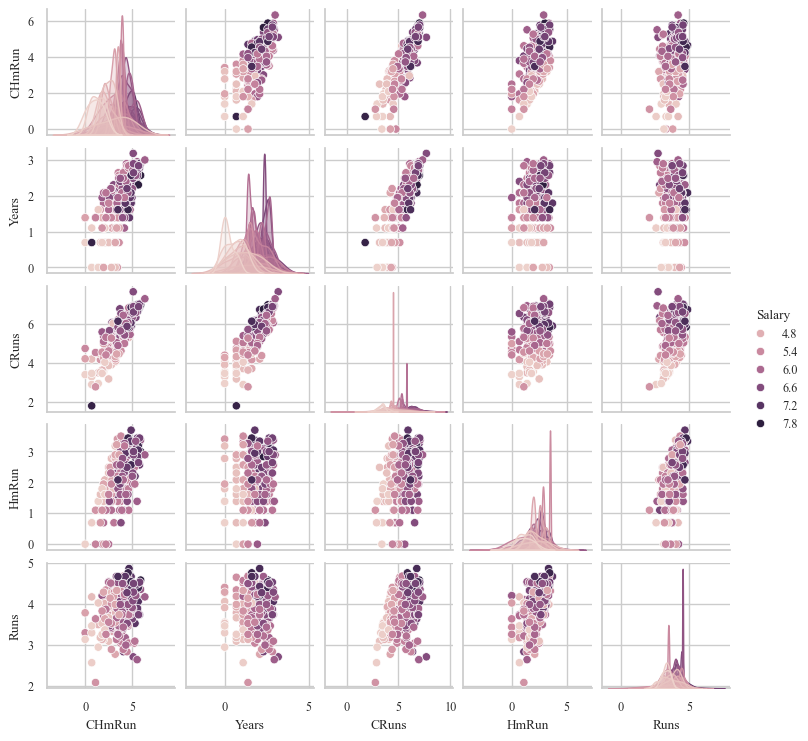

In [50]:
sns.pairplot(np.log(Xtrain_plot2), hue = 'Salary', height=1.5)

# 3. Analytical Statistics: Regression with the Statsmodel-Module

A regression tests hypotheses about how 2 quantitative variables relate to one another. The standard Ordinary Least Squares Regression (OLS) fits a straight line between 2 variables that minimizes the Sum of Squared Errors (SSE). Multivariate Regression does the same but with multiple independent variables. An equation with 3 independent variables looks like this: 
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon
$$

We are going to test the following hypotheses:\
H1: the more home runs a player had in his career, the higher the salary\
H2: the longer a player's career has been going on, the higher the salary\
H3: the more runs a player had in his career, the higher the salary

Native Python does not offer functions for regression analysis, and machine learning algorithms in Python usually do not provide the detailed information required for hypothesis testing. There is a package called statsmodels (beta version) which provides the required algorithms.

## 3.1 The null model

For statsmodels, we need to add an intercept to the dataset manually, using the add_constant() function from statsmodels.

In [34]:
# Create a constant to fit the intercept
from statsmodels.api import add_constant
Xtrain_const = add_constant(Xtrain)
Xtrain_const

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary
272,1.0,512,117,29,54,88,43,6,1750,412,100,204,276,155,100.0
262,1.0,275,68,5,42,42,61,6,961,238,16,128,104,172,191.0
23,1.0,472,116,16,60,62,74,6,1924,489,67,242,251,240,600.0
142,1.0,232,55,9,34,23,45,12,4405,1213,194,702,705,625,1300.0
297,1.0,193,47,10,21,29,24,6,1136,256,42,129,139,106,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1.0,246,76,5,35,39,13,6,912,234,12,102,96,80,250.0
313,1.0,580,207,8,107,71,105,5,2778,978,32,474,322,417,1600.0
95,1.0,382,119,13,54,58,36,12,2133,594,41,287,294,227,595.0
289,1.0,263,70,1,26,23,30,4,888,220,9,83,82,86,250.0


The we can proceed to fit a null model with only the constant as predictor. This requires several steps:
1. define the model
2. fit the model
3. print a summary of the results

Here, we fit a null model, so the equation is: 
$$ 
y = \beta_0 + \epsilon
$$

In the OLS() function, we can simply add the dependent variable and the constant as Pandas Series.

In [35]:
# Step 1: Define the model: Algorithm + Variables
model_0 = sm.OLS(ytrain, Xtrain_const['const']) 

In [36]:
# Step 2:   Fit the model on the data
results_0 = model_0.fit() 

In [38]:
# Step 3: inspect the results
#results_0.summary()
print(results_0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                nan
Time:                        10:41:08   Log-Likelihood:                -1577.5
No. Observations:                 210   AIC:                             3157.
Df Residuals:                     209   BIC:                             3160.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.6224     30.629     17.422      0.0

The model summary provides us with Goodness of Fit measures, which can serve as a baseline to evaluate the model. The explained variance (adjusted R2) is 0, and further models' improvements on the null model can be evaluated by the increases in explained variance. The Akaike Information Criterion (AIC) is 3157, and the Bayesian Information Criterion (BIC) is 3160. Further models' improvements on the null model can be evaluated by the degree to which these criteria decrease.\
Adjusted R2, AIC and BIC punish model complexity to varying degrees, with the hierarchy of the penalty being: adj. R2 < AIC < BIC.

See also:

https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2

https://en.wikipedia.org/wiki/Akaike_information_criterion

https://en.wikipedia.org/wiki/Bayesian_information_criterion

We can access the fitted values by calling "fittedvalues" from the results. Because the null model merely fits an intercept (meaning the constant, or ß0), all fitted values are equal to the intercept.

In [39]:
results_0.fittedvalues

272    533.622448
262    533.622448
23     533.622448
142    533.622448
297    533.622448
          ...    
255    533.622448
313    533.622448
95     533.622448
289    533.622448
50     533.622448
Length: 210, dtype: float64

## 3.2 Adding an independent variable

Now, we want to test hypothesis 1: the more home runs a player had in his career, the higher the salary.\
To do so, we add an independent variable to the model: the accumulated number of home runs scored by each player. In order to do so, we select multiple variables from the dataset. We can either use a list for indexing, or we use the slicing attribute .loc. 

In [ ]:
Xtrain_const[['const', 'CHmRun']]
#Xtrain_const.loc[:, ['const', 'CHmRun']]

,const,CHmRun
272,1.0,100
262,1.0,16
23,1.0,67
142,1.0,194
297,1.0,42
...,...,...
255,1.0,12
313,1.0,32
95,1.0,41
289,1.0,9


In [40]:
# Step 1: Define the model: Algorithm + Variables
model_1 = sm.OLS(ytrain, Xtrain_const[['const', 'CHmRun']]) # short version
#model_1 = sm.OLS(ytrain, Xtrain_const.loc[:, ['const', 'CHmRun']]) # with .loc attribute

In [41]:
# Step 2:   Fit the model on the data
results_1 = model_1.fit() 

In [42]:
# check the results
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     84.43
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.16e-17
Time:                        10:48:38   Log-Likelihood:                -1541.8
No. Observations:                 210   AIC:                             3088.
Df Residuals:                     208   BIC:                             3094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        328.6866     34.175      9.618      0.0

Adjusted R2 has increased from 0% to 28.5% when using the accumulated number of home runs as a predictor, indicating that the total number of home runs a player scored explains 28.5% of the variation in salaries. The AIC decreased from 3157 to 3088, and the BIC decreased from 3160 to 3094, indicating that model fit improved.\
The constant (or intercept) indicates that a player with 0 home runs earned USD 328,686.60 in 1987. The coefficient for CHmRun indicates that with each home run scored during the career, a players salary rose by USD 2,876.20. The P value is smaller or equal to 0.000, indicating that the effect is highly significant.\
Hypothesis 1 is thus confirmed.

Checking the fitted values reveals that now, each observation has a different predicted value.

In [43]:
results_1.fittedvalues

272     616.306260
262     374.705722
23      521.391763
142     886.668766
297     449.486841
          ...     
255     363.200935
313     420.724872
95      446.610644
289     354.572344
50     1136.897894
Length: 210, dtype: float64

## 3.3 Further developing the model

We have 2 more hypotheses to test:\

H2: the longer a player's career has been going on, the higher the salary\
H3: the more runs a player had in his career, the higher the salary

We can test them by subsequently integrating the respective indicators into the model. In order to reduce the amount of code and the objects stored in memory, we integrate step 1 and step 2 above into a single step.

In [44]:
# condensed code: Model 2
model_2 = sm.OLS(ytrain, Xtrain_const[['const', 'CHmRun', 'Years']]).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     42.04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.75e-16
Time:                        10:59:57   Log-Likelihood:                -1541.7
No. Observations:                 210   AIC:                             3089.
Df Residuals:                     207   BIC:                             3100.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.9953     48.985      6.859      0.0

Adjusted R2 has decreased from 28.5% to 28.2% when adding the duration of each player's career. The decrease indicates that the added explanatory value does not outweigh the added model complexity the second predictor brings. The AIC increased from 3088 to 3089, and the BIC increased from 3094 to 3100, indicating that model fit worsened.\
The P value of Years is larger than 0.1, indicating that the effect is not significant.\
Hypothesis 2 is thus falsified.

At this point, we have a choice to either remove the variable Years, or to leave it in the model. Some machine learning algorithms would remove the variable at this point and probably test it again later during model development. But since we are testing hypotheses, a falsification is an important result and we will keep it for now.

Let's continue with hypothesis 3 and the accumulated number of runs.

In [45]:
# Model 3: 
model_3 = sm.OLS(ytrain, Xtrain_const[['const', 'CHmRun', 'Years', 'CRuns']]).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     38.52
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           8.37e-20
Time:                        11:08:59   Log-Likelihood:                -1530.8
No. Observations:                 210   AIC:                             3070.
Df Residuals:                     206   BIC:                             3083.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.0075     47.556      8.012      0.0

Adjusted R2 has increased from 28.2% to 35% when adding the accumulated number of runs as a predictor. The AIC decreased from 3089 to 3070, and the BIC decreased from 3100 to 3083, indicating that model fit improved.\
Something very interesting happened: with the CRuns variable added, all independent variables have a P value of below 0.01, indicating that their effects are significant. So, adding the total number of Runs reinforced an effect of the total length of the career which previously did not come out.

The constant (or intercept) indicates that a player with 0 home runs, 0 runs and who is during the first year of his career earned USD 381,007.50 in 1987. This estimate may be a by-product of the estimation rather than a plausible prediction.
The coefficient for CHmRun indicates that with each home run scored during the career, a players salary rose by USD 1,461.20. With every run, the salary rose by USD 874.80. Both hypothesis 1 and 3 are thus confirmed.
For every year of a player's career, the salary decreases by USD 36,435.40, meaning that players earn less while they grow older. The effect is significant, but hypothesis 2 was based on wrong assumptions about the direction of the effect. The hypothesis 2 assumed that players make more when they get more experienced, and it is falsified by the results.

## 3.4 Log Transformations

In a log-linear model, we apply log-transformation to the dependent variable, while leaving the independent variables as they are. This can be easily achived by using np.log(). Because we change the dependent variable, the Goodness-of-Fit values are not directly comparable to those above. The model equation is: 
$$
log(y) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon
$$


In [46]:
# Model 4: log-linear 
model_4 = sm.OLS(np.log(ytrain), # log-transform dependent variable
                 Xtrain_const[['const', 'CHmRun', 'Years', 'CRuns']] # leave independent variables as is
                 ).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     42.30
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.42e-21
Time:                        11:23:33   Log-Likelihood:                -218.47
No. Observations:                 210   AIC:                             444.9
Df Residuals:                     206   BIC:                             458.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3757      0.092     58.501      0.0

In a log-linear model, the interpretation of coefficients is "relatively" straightforward. For example, each additional home run increases the salary by 0.0012 log USD 1000. This roughly corresponds to an increase of 0.12% in natural 1000 USD, i.e. the exponentiated coefficient of CHmRun.

In [50]:
np.exp(0.0012)

1.0012007202880864

In order to calculate a log-log model, we need to log-transform the independent variables and make sure to avoid the value 0 causing infinite values during log-transformation. One straightforward way would be to drop observations with any 0 values, but this would decrease sample size and require adjustments to y as well. Therefore, we here add 1 to all observations in the independent variables. We can apply np.log() to an entire data frame, but we want to make sure the constant is still 1, and not log(1) = 0.

In [47]:
# log-transform independent variables
add_constant(np.log(Xtrain[['CHmRun', 'Years', 'CRuns']] + 1))

,const,CHmRun,Years,CRuns
272,1.0,4.615121,1.945910,5.323010
262,1.0,2.833213,1.945910,4.859812
23,1.0,4.219508,1.945910,5.493061
142,1.0,5.273000,2.564949,6.555357
297,1.0,3.761200,1.945910,4.867534
...,...,...,...,...
255,1.0,2.564949,1.945910,4.634729
313,1.0,3.496508,1.791759,6.163315
95,1.0,3.737670,2.564949,5.662960
289,1.0,2.302585,1.609438,4.430817


The equation for a log-log model is: 
$$
log(y) = \beta_0 + \beta_1 log(x_1) + \beta_2 log(x_2) + \beta_3 log(x_3) + \epsilon
$$

Because we added 1 to each predictor, we actually work with this: 
$$
log(y) = \beta_0 + \beta_1 log(x_1 + 1) + \beta_2 log(x_2 + 1) + \beta_3 log(x_3 +1) + \epsilon
$$

In [48]:
model_5 = sm.OLS(np.log(ytrain), # log-transform dependent variable
                 add_constant(np.log(Xtrain[['CHmRun', 'Years', 'CRuns']] + 1)) # log-transform independent variables
                 ).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     92.11
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.66e-38
Time:                        11:30:27   Log-Likelihood:                -179.54
No. Observations:                 210   AIC:                             367.1
Df Residuals:                     206   BIC:                             380.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7747      0.255     10.901      0.0

Adjusted R2 has increased from 37.2% to 56.7% with log-transformation of the predictors. This indicates a better fit of the model to the data, but such a high level of explained variance may also point to multicollinearity (see below).
 The AIC decreased from 444.9 to 367.1, and the BIC decreased from 458.3 to 380.5, indicating that model fit improved.

The constant (or intercept) indicates that a player earns a salary of 2.775 logged USD 1000, if the log of each (x + 1) equals 0. We can exponentiate this value to get to regular USD as a unit: the intercept is equivalent to USD 16,033.82.

With each increase of 1 in log(CHmRun + 1), the salary increases by 0.1252 log(USD 1000), which is equivalent to USD 1,133.36.


Note that you can transform the additive log-log equation top return to natural units of y:
$$
log(y) = \beta_0 + \beta_1 log(x_1) + \beta_2 log(x_2) + \beta_3 log(x_3) + \epsilon
$$

Exponentiate both sides of the equation, which then yields a multiplicative model: 

$$
y = e^{\beta_0 + \beta_1 log(x_1) + \beta_2 log(x_2) + \beta_3 log(x_3)} + \epsilon = e^{\beta_0} * e^{\beta_1 log(x_1)} * e^{\beta_2 log(x_2)} * e^{\beta_3 log(x_3)} + \epsilon = e^{\beta_0} * x_1^{ß1} * x_2^{ß2} + x_3^{ß3} + \epsilon
$$

With the adjustment we made to avoid log(0), it would look like this: 

$$
y = e^{\beta_0 + \beta_1 log(x_1 + 1) + \beta_2 log(x_2 + 1) + \beta_3 log(x_3 + 1)} + \epsilon = e^{\beta_0} * e^{\beta_1 log(x_1 + 1)} * e^{\beta_2 log(x_2 + 1)} * e^{\beta_3 log(x_3 + 1)} + \epsilon = 
$$

$$
 = e^{\beta_0} * (x_1 + 1)^{ß1} * (x_2 + 1)^{ß2} + (x_3 + 1)^{ß3} +\epsilon
$$

## 3.4 Model diagnostics

Multivariate Regression (MLR) using ordinary least squares is based on a series of assumptions which, if violated, negatively affect the validity of the model.

**Gauss-Markov Assumptions:**

MLR.1 Linearity in parameters: the underlying population features a linear connection between the variables of interest

MLR.2 Random sampling: our data is a random sample representative of the population

MLR.3 No perfect collinearity: variables should not be linear combinations of one another and not too highly correlated

MLR.4 Zero-conditional mean of the error given the independent variables (includes: no important variable is missing)\
For example: omitting an important x correlated with both y and one or more x (omitted variable bias)\
For example: an x is correlated with the error (endogeneity)

MLR 1 to 4 are given, the OLS estimator is unbiased (meaning the algorithm; individual random samples may still feature bias; calculating a model on all possible random samples will give an unbiased estimate, which is what some machine learning algorithms do)

MLR.5 Homoskedasticity: the error in the population has the same variance given any value of the explanatory variables\
If MLR 1 - 5: correct variance & error estimation; OLS is unbiased & efficient  (BLUE: Best Linear Unbiased Estimator)

MLR.6 Normal distribution of errors in the population (unobserved)\
Not required for the estimation, but required for inference in small samples (t-tests, F-tests, confidence intervals, p-values). In large samples, inference is still asymptotically correct.\
Note that log-transformed variables are closer to a normal distribution, and may also yield errors that are closer to a normal distribution.

Unlike in R, Python does not provide convenient routines for basic diagnostic plots. However, we can create such plots by hand with relative ease. To do so, we need to access core components of the model such as fitted values and residuals. Remember that the plots show residuals from the sample, the population error is unknown. Whether these sample residuals are good estimates of the population error depends on whether the sample is representative, which in turn depends on random sampling (MLR.2).

In [51]:
# fitted values
model_3.fittedvalues

272     487.040825
262     297.813579
23      472.065830
142     841.510618
297     336.679142
          ...     
255     269.222960
313     660.313258
95      254.890397
289     321.068284
50     1049.833695
Length: 210, dtype: float64

In [52]:
# residuals
model_3.resid

272   -387.040825
262   -106.813579
23     127.934170
142    458.489382
297    -91.679142
          ...    
255    -19.222960
313    939.686742
95     340.109603
289    -71.068284
50    -174.833695
Length: 210, dtype: float64

The following plots compare Model 3 and Model 5 (the log-log version) to illustrate the changes that come with log-transformation.

Plot 1a and 1b show the residuals (differences between observed and predicted values in the sample) on the y-axis and the fitted (predicted) values on the x-axis. They are connected to MLR.1 (linearity in parameters): if the plot shows a random scatter around y = 0, MLR.1 is a reasonable assumption. Any systematic patterns (curves, slopes) indicate the model does not fit the data well. Additionally, if the residuals spread out, this points to heteroskedasticity (violation of MLR.5).

While neither of the two plots looks perfect, Model 5 displays less spread; Model 3 may have more pronounced heteroskedasticity problems. Furthermore, both models may feature minor violations of MLR.1, and more predictors may be needed to achieve better fit of model and data.

Text(0.55, -0.15, 'Model 5')

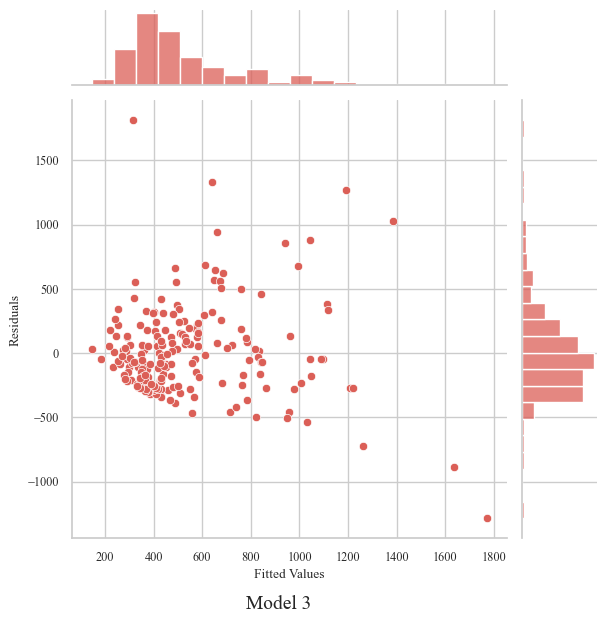

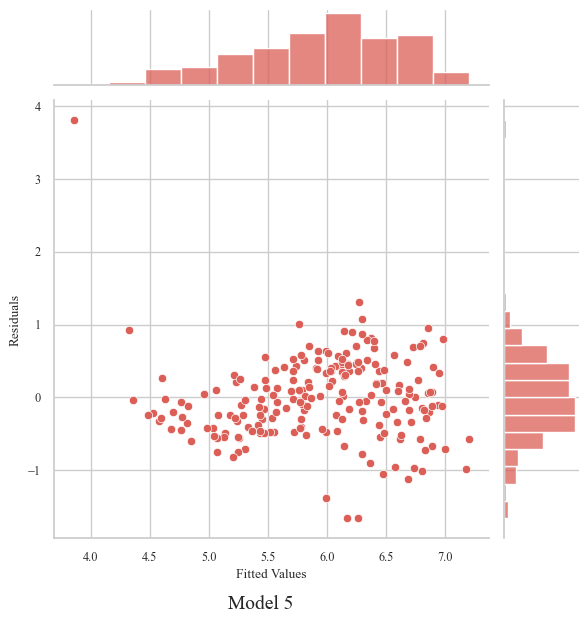

In [53]:
# 1a. Residuals vs. Fitted Joint Plot Model 3
sns.jointplot(x = model_3.fittedvalues, y = model_3.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.text(0.55, -0.15, 'Model 3', ha='right', va='center', transform=plt.gca().transAxes, fontsize=14)

# 1b. Residuals vs. Fitted Joint Plot Model 5
sns.jointplot(x = model_5.fittedvalues, y = model_5.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.text(0.55, -0.15, 'Model 5', ha='right', va='center', transform=plt.gca().transAxes, fontsize=14)

The Quantile-Quantile (QQ) plots compare quantiles of residuals to a theoretical normal distribution. If they are normally distributed, the residuals form a straight line along the dots. Deviations from the straight line, particularly at the ends (tails), suggest non-normality, which violates the normality assumption of residuals (MLR.6). Severe deviations could indicate the presence of outliers (see below) or issues with the model specification (MLR.1 & 4).

The calculation makes use of standardized (or: internally studentized) residuals. Standardized residuals are scaled by standard deviation and better suited to comparing residuals across observations. If they are bigger than a certain threshold (2 or 3), they may indicate outliers.

The plots reveal that in Model 5, the deviations from the normal distribution are substantially reduced, even though a few irregularities remain.

In [ ]:
# get standardized residuals
model_3.get_influence().resid_studentized_internal

array([-1.08962948, -0.29986588,  0.35868115,  1.29177572, -0.25746989,
        0.04881003,  0.03000678,  1.94002767, -0.28197687,  0.21165339,
       -0.24549898,  0.0398019 ,  0.63629439,  0.62128598,  0.19865108,
        0.16494227,  0.06307247,  0.06830541, -0.13659526, -0.64442994,
       -0.62194579, -0.30377804,  1.05769144, -0.46368218, -0.75798019,
        0.01000091,  1.6102917 , -3.03526491, -0.75791654, -1.02958374,
       -0.81183593,  0.49783917,  0.69689543, -0.23560978, -0.34805405,
        0.08385105, -1.03265769,  0.17874846, -0.74657899, -0.04311158,
       -0.65853278,  0.44914903, -0.45040851,  0.53938352,  0.17021548,
        0.97516987, -0.7586629 , -0.77894138, -0.11893856, -0.64853397,
       -0.74087063,  0.09392819,  0.25801406,  1.74894578,  0.82566582,
        1.41141174, -0.24757614, -0.83503693, -0.30972082, -0.93196476,
       -0.74709154, -0.13867223,  0.92981553, -0.35542901, -0.83337322,
       -0.70876266, -1.28856142, -0.88778514,  0.733238  ,  0.10

Text(0.7, -0.15, 'Model 5 - Q-Q Residuals')

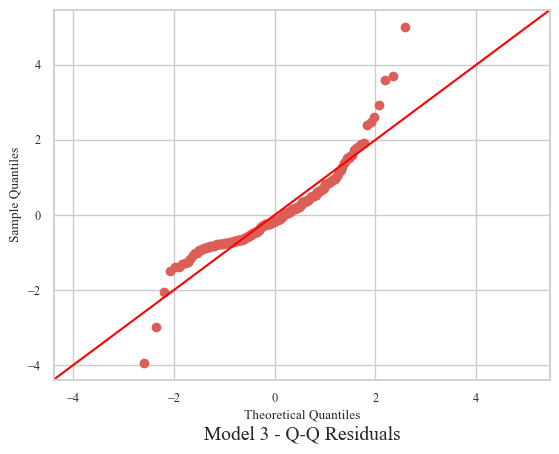

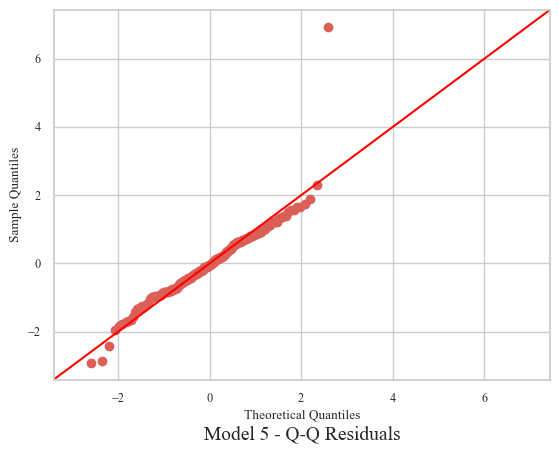

In [ ]:
# 2a. Q-Q Plot for residuals Model 3
sm.qqplot(model_3.get_influence().resid_studentized_internal, line='45', fit=True)
plt.text(0.7, -0.15, 'Model 3 - Q-Q Residuals', ha='right', va='center', transform=plt.gca().transAxes, fontsize=14)
# 2b. Q-Q Plot for residuals Model 5
sm.qqplot(model_5.get_influence().resid_studentized_internal, line='45', fit=True)
plt.text(0.7, -0.15, 'Model 5 - Q-Q Residuals', ha='right', va='center', transform=plt.gca().transAxes, fontsize=14)

The third diagnostic plot illustrates the square root of the (absolute value of the) standardized residuals and the fitted values. 

A horizontal line with evenly spread residuals indicates constant variance (Homoskedasticity, MLR.5).
If there are patterns (slopes, curves), MLR.5 is violated (Heteroskedasticity) and your error estimates may be problematic.

Again, the plots point ot marked improvements of Model 5 over Model 3.

Text(0, 0.5, 'Sqrt(Abs(Residuals))')

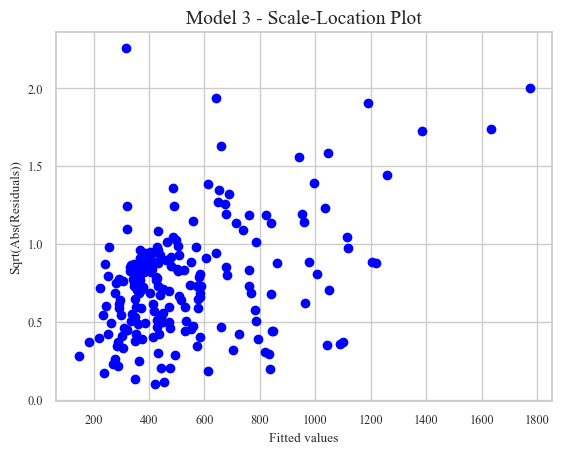

In [149]:
# Plot 3a: Scale-Location plot Model 3
plt.scatter(model_3.fittedvalues, np.sqrt(np.abs(model_3.get_influence().resid_studentized_internal)), color = 'blue')
plt.title('Model 3 - Scale-Location Plot', fontsize=14)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Abs(Residuals))')

Text(0, 0.5, 'Sqrt(Abs(Residuals))')

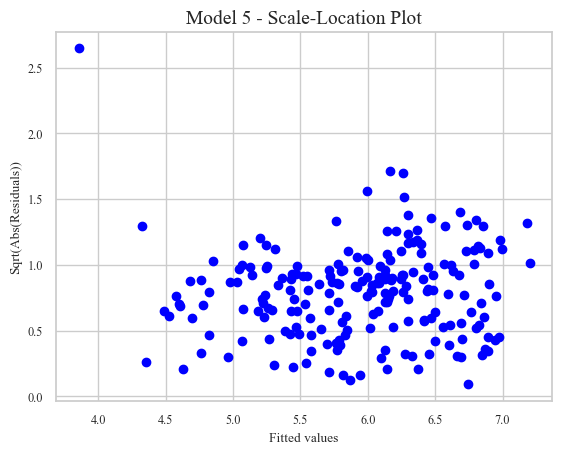

In [150]:
# Plot 3b: Scale-Location plot Model 5
plt.scatter(model_5.fittedvalues, np.sqrt(np.abs(model_5.get_influence().resid_studentized_internal)), color = 'blue')
plt.title('Model 5 - Scale-Location Plot', fontsize=14)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Abs(Residuals))')


The fourth diagnostic plot features standardized residuals versus Leverage. The leverage measures the influence of an observation on the model results. Influential outliers have a high standardized residual and a high leverage. Cook's Distance values surpassing thresholds of 0.5 or 1 indicate influential outliers. Influential outliers can distort the relationship between x and y (MLR.1), and the residuals so that they do not have the zero-conditional mean (MLR.4) and Homoskedasticity (MLR.5). 

In the plots below, point size is linked to Cook's Distance. Model 3 features 2 potential outliers - large red points in the upper or lower right corner. Model 5 only features one. Outliers may be treated by adding additional independent variables that explain those observations better, or by removing them from the sample.

/var/folders/qv/smsch5gx4359_jg3r5kym8y40000gn/T/ipykernel_5694/716026340.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/qv/smsch5gx4359_jg3r5kym8y40000gn/T/ipykernel_5694/716026340.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


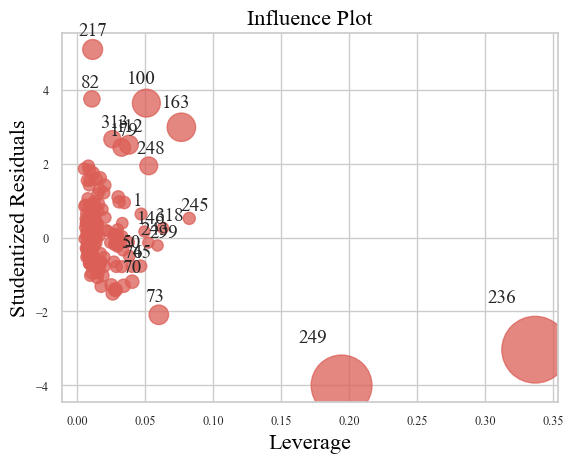

In [ ]:
# 4a. Residuals vs. Leverage Plot (Influence plot) Model 3
plt = plt = sm.graphics.influence_plot(results = model_3,
                                external = False, # For standardized residuals (i.e. internally studentized)
                                # alpha = 0.08, # adjust the thresholds
                                criterion="cooks" # Point size represents Cook's Distance
                                )
plt.show()

/var/folders/qv/smsch5gx4359_jg3r5kym8y40000gn/T/ipykernel_5694/1696871066.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


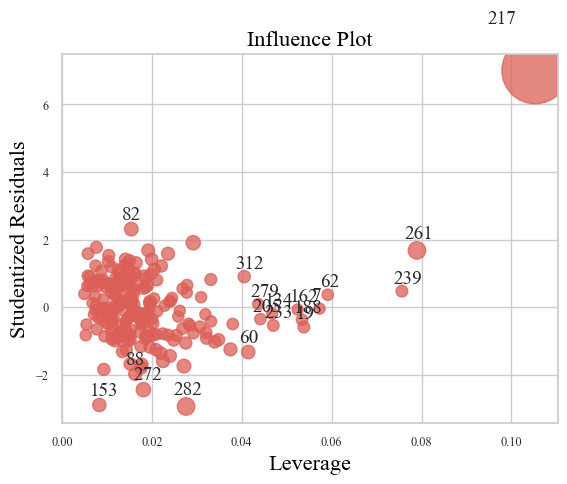

In [ ]:
# 4b. Residuals vs. Leverage Plot (Influence plot) Model 5
plt = sm.graphics.influence_plot(results = model_5,
                                external = False, # For standardized residuals (i.e. internally studentized)
                                # alpha = 0.08, # adjust the thresholds
                                criterion="cooks" # Point size represents Cook's Distance
                                )
plt.show()

Last but not least, we should check for multicollinearity. As a rule of thumb, if you have independent variables that are strongly correlated, you should check if you get big jumps in explained variance when you add them both to a model. You can check correlations with a correlation matrix and a heat map, as illustrated below.

# 4. Basic Machine Learning Workflow with Scikit Learn


#### Machine Learning terminology (for this class): 
ALGORITHM: Machine learning algorithms are procedures that are implemented in code and are run on data.

LOSS FUNCTION: The algorithm minimizes a loss function (or error function) when applied to data. Common loss functions include:\
OLS Regression: Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
Logistic Regression / Maximum Likelihood Estimation: Log-Likelihood
In statistics, the ALGORITHM is also called the ESTIMATOR (like OLS or Maximum Likelihood)

MODEL: Machine learning models are output by algorithms and are comprised of model data and a prediction algorithm.\
The model data includes the selection of variables.\
The model parameters (i.e. coefficients) which are LEARNED during training and then generalized to predict labels for unlabeled data.\

In statistics, we often work with samples of underlying populations. Hypotheses are typically tested on random samples drawn from an underlying population. Generalization from the sample to the population is expected to hold if (a) the sample is really a random one (and not a biased sample) (b) the results of the test are significant (and thus can be generalized), among other things.

In machine learning, this process is mimicked in a way. We have an underlying data set that we split (randomly) into training and test data. Both are random samples of the original data set. Therefore, we expect hypothesis tests that are significant on the training data to also be significant in the test data.

In Python, we have a widely unsed and integrated package for Machine Learning: Scikit Learn. It provides fewer details on the models than the statsmodels package. The focus is on Goodness of Fit. Here, we will first train a model on the training data, and then test it on the test data. Subsequently, we will predict the salaries of Baseball players who did not report their income.

In [16]:
# Import basic functions
from sklearn.linear_model import LinearRegression # Algorithm
from sklearn.metrics import r2_score # Goodness-of-Fit measure
from sklearn.metrics import mean_squared_error # Loss function

## 4.1 Training the model

First, we train the model in a similar way as we conducted model development above. OLS does not have its own feature selection routine, so we just add the same variables as above step by step and check the results. 

A core metric for model evaluation is the Root Mean Squared Error (RMSE). It is the square-root of the mean squared error (i.e. real values - fitted values). In analytical statistics, we would refer to this "error" as residuals" (because error is reserved for the underlying population). In Machine Learning, we distinguish training error (on training data) from test error (on test data). Models are optimized by minimizing a "Loss Function" (in this case RMSE).

In the following, we focus on compariong the Root Mean Squared Error (RMSE) on the training and test data. Our aim is to find a model that minimizes this error for both datasets, but mostly for the test data.

In [17]:
# define the algorithm
algorithm_OLS = LinearRegression(fit_intercept=True)

In [18]:
# Fit a null model or intercept model:
## First, create inputs
X = np.ones((ytrain.shape[0], 1)) 
X

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [19]:
# Second, fit the model
model_0_fit = algorithm_OLS.fit(X, ytrain)

In [20]:
# get the training error: (RMSE)
y_0pred = model_0_fit.predict(np.ones((ytrain.shape[0], 1))) # predict / create fitted values
rmse = np.sqrt(mean_squared_error(ytrain, y_0pred)) # get RMSE
print(f'RMSE training Model 0: {rmse}')

RMSE training Model 0: 442.7987569482914


In [21]:
# Model with a single predictor
# Convert the Series to a DataFrame and fit the model
model_1_fit = algorithm_OLS.fit(pd.DataFrame(Xtrain['CHmRun']), ytrain)

In [22]:
# get the training error: (RMSE)
y_1pred = model_1_fit.predict(pd.DataFrame(Xtrain['CHmRun']))
rmse = np.sqrt(mean_squared_error(ytrain, y_1pred)) 
print(f'RMSE training Model 1: {rmse}')

RMSE training Model 1: 373.4449249214614


The RMSE decreased when we added the predictor CHmRUn.

In [23]:
# A model with 2 variables
# Convert the Series to a DataFrame and fit the model
model_2_fit = algorithm_OLS.fit(pd.DataFrame(Xtrain[['CHmRun', 'CRuns']]), ytrain)

In [24]:
# get the training error: (RMSE)
y_2pred = model_2_fit.predict(pd.DataFrame(Xtrain[['CHmRun', 'CRuns']]))
rmse = np.sqrt(mean_squared_error(ytrain, y_2pred)) 
print(f'RMSE training Model 2: {rmse}')

RMSE training Model 2: 364.9069100689862


RMSE decreased further.

In [25]:
# A model with 3 variables
# Convert the Series to a DataFrame and fit the model
model_3_fit = algorithm_OLS.fit(pd.DataFrame(Xtrain[['CHmRun', 'CRuns', 'Years']]), ytrain)

In [26]:
# get the training error: (RMSE)
y_3pred = model_3_fit.predict(pd.DataFrame(Xtrain[['CHmRun', 'CRuns', 'Years']]))
rmse = np.sqrt(mean_squared_error(ytrain, y_3pred)) 
print(f'RMSE training Model 3: {rmse}')

RMSE training Model 3: 354.4143734854675


In [27]:
# Get a basic model summary

coefficients = model_3_fit.coef_
intercept = model_3_fit.intercept_
r_squared = r2_score(ytrain, y_3pred) # calculate R2

# print the results
print("Model Summary:")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R-squared: {r_squared}")
print(f'RMSE training: {rmse}')

Model Summary:
Intercept: 381.00749697954274
Coefficients: [  1.46118158   0.87484202 -36.42543373]
R-squared: 0.35936617225771306
RMSE training: 354.4143734854675


## 4.2 Testing the model on the test data

Now we fit the model to the test data and see how the RSME changes.
We can use the predict function on the test data set to get predictions.

In [28]:
# Make predictions
y_3tstpred = model_3_fit.predict(pd.DataFrame(Xtest[['CHmRun', 'CRuns', 'Years']]))
y_3tstpred

array([ 490.13825012,  438.62580591,  461.8950766 ,  378.54735898,
        354.06111696,  448.46510377,  369.24345287,  370.83665854,
        712.47383399,  525.0544043 ,  343.80341718, 1309.65750101,
        565.18948213,  819.58347413,  907.82410369,  339.07393739,
        543.0213796 ,  446.38602925,  347.79292887,  485.46105766,
        360.18501112,  405.65670216,  514.69553409,  425.39479517,
        418.39463408,  452.04057367, 1080.24858945,  423.53966596,
       1108.23989922,  528.67939709,  702.1657408 ,  508.70508894,
        454.76272061,  370.76064212,  772.94195382,  337.66236411,
       1238.90739791,  582.20685312,  434.46905632,  634.61929336,
        293.61158097,  481.86130426,  481.2914239 ,  534.41361836,
        480.22000061,  593.137114  ,  302.65783828,  299.75556926,
        552.08116087,  235.42205215,  331.49819627,  397.08191922,
        422.69006334])

In [29]:
# check for NaN: format as Pandas Series and apply functions
pd.Series(y_3tstpred).isna().sum()

0

In [30]:
# Calculate the test error
rmse_test = np.sqrt(mean_squared_error(ytest, y_3tstpred)) 
print(f'RMSE test Model 3: {rmse_test}')

RMSE test Model 3: 380.6729046563333


## 4.3 Predict Values on Prediction Data

In [31]:
Hit_pred['Salary'] = model_3_fit.predict(pd.DataFrame(Hit_pred[['CHmRun', 'CRuns', 'Years']]))

In [32]:
Hit_pred['Salary'] 

0       372.288506
15      293.611581
18      652.543870
22      173.250836
30      992.791606
32      844.121534
36      376.164662
38      827.454373
39      375.787874
41      488.938292
42      444.959336
44      499.016570
48     1005.047304
52      239.391470
57      307.998112
64      289.228036
66      312.050031
69      526.063421
71      318.135161
77      252.110818
80     1232.275476
83      399.647673
94      362.071079
97      581.052929
101     436.218740
103     375.122753
104    1052.228491
105     308.665528
106     384.390660
114    1096.435112
125     894.840938
138     329.250459
144     537.647343
150     193.575354
157     348.458220
158     660.291909
160      64.993671
169     334.777254
171     354.272093
173     369.778845
197     362.078904
199     612.621833
203     357.271983
208     313.501878
210     365.849615
225     461.769366
228     609.480584
235     551.675029
246     440.312443
250     346.331747
253     379.305911
254     483.895856
270     348.

So, training and test data are random samples of the population of players for whom we know the salaries. Do our predictions truly match the actual salaries of the players whose salaries we do not know? It depends on several factors, including (a) how good the model is, and (b) whether the salary information was missing AT RANDOM or not. Missing COMPLETELY AT RANDOM means missingness not being caused by any (observed or unobserved) variables. We can safely assume this with simulated data where we created the missing values ourselves. With observational data, the situation is much more tricky, and a lot of the time we do not know. If information was missing at random, a good model can accurately predict the salaries. If information was missing NOT AT RANDOM, like for a specific group (like the wealthiest or the poorest players), then this bias may also affect our predictions.

Therefore, it is imperative to think about the quality of your data, and not to blindly trust algorithms. Ask yourself: Is the data I have representative of the population I am interested in? (if not, accept it as a limitation) Can I realistically expect that missing values are missing at random? (if not, accept it as a limitation)


# 5. Pre-processing

Modern Machine Learning combines advanced feature selection approaches (which we do not cover here), and with feature engineering algorithms (such as Principal Component Analysis or PCA). In Scikit Learn, we can include a processing steps for log-transformation or principal components. Pipelines are a crucial instrument to accomplish this.

In [33]:
# load packages and functions
from sklearn.linear_model import LinearRegression # Algorithm 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## 5.1 Log-Transformation

Define a function for log-transformation with an offset of 1.

In [34]:
# Log transformation function
def log_transform(X):
    return np.log(X + 1)

Create a pipeline: the different steps must be specified as a list of tuples. The list preserves the order of the steps.

In [35]:
# Create a pipeline
log_log_pipeline = Pipeline(steps = [
    ('log_transform_X', FunctionTransformer(log_transform, validate=False)),
    ('log_transform_y', FunctionTransformer(log_transform, validate=False)),
    ('linear_regression', LinearRegression())
])

In [36]:
# Fit the model
log_log_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('log_transform_X',
                 FunctionTransformer(func=<function log_transform at 0x12e5ceaf0>)),
                ('log_transform_y',
                 FunctionTransformer(func=<function log_transform at 0x12e5ceaf0>)),
                ('linear_regression', LinearRegression())])

In [37]:
# Making predictions
y_loglog_pred = log_log_pipeline.predict(Xtest)

In [38]:
# Print the predictions
print("Predictions on test set (log-log model with offset):", y_loglog_pred )

Predictions on test set (log-log model with offset): [  528.59111608   424.23980373   811.69137901   633.18489351
   416.23670817   485.36413717   491.09463764  -225.31472772
   776.92052374   522.3681095    160.21780058   946.44557305
   670.48511554   901.20448426   922.70399632   100.8452404
   667.97622631   673.88719471 -1911.27125762   374.99033717
   490.27115191   448.84054061   754.61627932   340.71421591
   279.83604345   506.2045866    995.44604352   638.49721513
  1013.32134495   583.15537823  1014.83048684   535.30345318
   664.16333363   434.0245855    875.6865736    699.34065766
   907.3352291    252.274869     346.00405757   595.44975783
    38.14325586   537.8409991    868.308507     962.47644721
   370.53730041   681.80772784    69.57184062   159.5242483
   600.87568031   563.30844615  -313.03916008   209.66094838
   737.56730368]


In [39]:
# To get coefficients of the linear regression
linear_model = log_log_pipeline.named_steps['linear_regression']
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [  7203.21849913  -2413.00171523    451.26273439  -1413.38679286
  -1698.51929655    714.37821091    441.43341616 -12529.60318454
   7635.22416718   -421.1448178    1743.09257786   2226.26555442
   -350.47187501]
Intercept: -685.1844704671323


## 5.2 Pre-preocessing with Principal Component Analysis



We can use Principal Component Analysis (PCA) to condense the highly correlated groups of variables into single mathematical entities. This way, we can make use of most the variation in the data while avoiding multi-collinearity. This comes at a cost: the PCA-inputs are usually not easily interpretable. This is a big problem for orthodox analytical statistics. In Machine Learning, we can be more relaxed about it since our goal is to predict rather than to test hypotheses.

Inspect correlations in the dataset: we have 2 large fields of of correlation. In fact, it is reasonable to expect that Principal Component Analysis can distinguish on its own between the indicators for performance in 1986 and total career performance.

In [40]:
# Preparation: Calculate the correlation matrix
corr_matrix = Xtrain.corr()
corr_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
AtBat,1.000000,0.965144,0.548197,0.896575,0.805532,0.651554,-0.003765,0.203459,0.223703,0.222613,0.238772,0.226384,0.148197
Hits,0.965144,1.000000,0.513536,0.905013,0.791068,0.621344,0.005779,0.206260,0.236533,0.200116,0.243195,0.226718,0.143708
HmRun,0.548197,0.513536,1.000000,0.628913,0.843470,0.472144,0.103386,0.207000,0.203297,0.491453,0.252778,0.341269,0.237431
Runs,0.896575,0.905013,0.628913,1.000000,0.781734,0.736961,-0.021416,0.168267,0.187071,0.235250,0.240170,0.202151,0.187922
RBI,0.805532,0.791068,0.843470,0.781734,1.000000,0.591784,0.131531,0.289541,0.303728,0.457020,0.325852,0.399993,0.259522
Walks,0.651554,0.621344,0.472144,0.736961,0.591784,1.000000,0.104531,0.246355,0.250148,0.342919,0.319138,0.291690,0.420252
Years,-0.003765,0.005779,0.103386,-0.021416,0.131531,0.104531,1.000000,0.910836,0.891319,0.718376,0.870344,0.859731,0.829484
CAtBat,0.203459,0.206260,0.207000,0.168267,0.289541,0.246355,0.910836,1.000000,0.995275,0.802833,0.983160,0.951657,0.902807
CHits,0.223703,0.236533,0.203297,0.187071,0.303728,0.250148,0.891319,0.995275,1.000000,0.785860,0.983740,0.946844,0.885945
CHmRun,0.222613,0.200116,0.491453,0.235250,0.457020,0.342919,0.718376,0.802833,0.785860,1.000000,0.826443,0.926717,0.805429


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

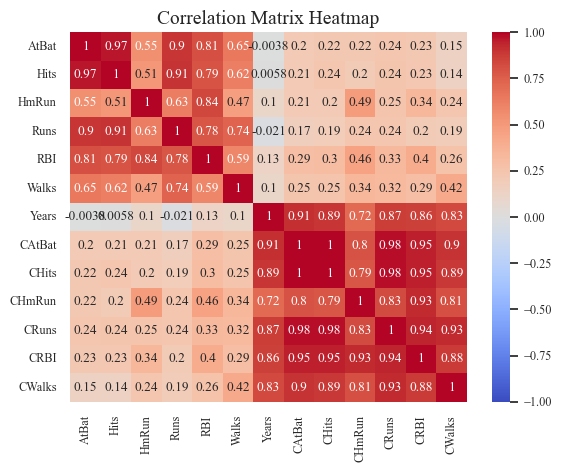

In [ ]:
# Plot the heatmap
plt = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.set_title("Correlation Matrix Heatmap", fontsize = 14)

We can simply run PCA on all the inputs

In [41]:
# Create a pipeline
pca_pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),               # Step 1: Standardize the data
    ('pca', PCA(n_components=2)),               # Step 2: Apply PCA and specify the number of components
    ('linear_regression', LinearRegression())   # Step 3: Fit a linear regression model
])


In [42]:
# Fit the model
pca_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('linear_regression', LinearRegression())])

In [43]:
# Making predictions
y_pca_tstpred = pca_pipeline.predict(Xtest)

In [44]:
# Print predictions
print("Predictions on test set:", y_pca_tstpred)

Predictions on test set: [ 389.10479091  232.29469703  741.29000066  528.17625095  545.13198057
  623.39869451  520.49030939   98.66045712  921.46827906  684.35009384
  214.27995385 1250.88802367  511.29513905  885.27302086  904.16018014
  145.65197298  649.2218069   656.90900742  -56.2109875   469.45485973
  408.67283313  392.97060698  542.2488477   360.53171731  352.76880604
  698.09311074 1086.1756635   491.85700677  953.7205073   502.89142677
  728.80535871  416.23727299  654.29930541  380.42238586  829.73192549
  478.85503961 1049.51866538  700.55656839  308.17251798  856.41526535
  193.54053965  576.59047781  622.88126322  699.46642187  495.56561747
  825.52559612  144.77142391  271.08959002  799.84080534  165.55315279
  109.8553119   348.05460815  708.10983573]


In [45]:
# To get PCA components
pca_model = pca_pipeline.named_steps['pca']
print("PCA components:\n", pca_model.components_)

PCA components:
 [[ 0.19584486  0.19389658  0.19832704  0.19531903  0.23647664  0.20561179
   0.2842002   0.33467515  0.3345359   0.32228023  0.342835    0.34390861
   0.32249553]
 [ 0.39688596  0.39097411  0.27423753  0.4044462   0.33899727  0.27537188
  -0.27808509 -0.20334522 -0.19202835 -0.11093381 -0.1746318  -0.16696006
  -0.18399804]]


In [46]:
# Explained variance of the principal components
print("Explained variance ratio:", pca_model.explained_variance_ratio_)

Explained variance ratio: [0.55475271 0.29555812]


## 4.3 Mixed pipeline


In [47]:
# Create a pipeline
log_pca_pipeline = Pipeline([
    ('log_transform_X', FunctionTransformer(log_transform, validate=False)), # log-transform X
    ('log_transform_y', FunctionTransformer(log_transform, validate=False)), # log-transform y
    ('scaler', StandardScaler()),           # Standardize the data
    ('pca', PCA(n_components=2)),          # Apply PCA
    ('linear_regression', LinearRegression())  # Fit a linear regression model
])

In [48]:
# fit the model
log_pca_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('log_transform_X',
                 FunctionTransformer(func=<function log_transform at 0x12e5ceaf0>)),
                ('log_transform_y',
                 FunctionTransformer(func=<function log_transform at 0x12e5ceaf0>)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('linear_regression', LinearRegression())])

In [49]:
# make predictions
y_logpca_tstpred = log_pca_pipeline.predict(Xtest)

Let us compare the results: it seems that the PCA pipeline has the lowest error. The log-log model may be 

In [50]:
print(f'Regular RMSE test: {np.sqrt(mean_squared_error(ytest, y_3tstpred))}')
print(f'Log-Log RMSE test: {np.sqrt(mean_squared_error(ytest, y_loglog_pred ))}')
print(f'PCA RMSE test: {np.sqrt(mean_squared_error(ytest, y_pca_tstpred))}')
print(f'Log-PCA RMSE test: {np.sqrt(mean_squared_error(ytest, y_logpca_tstpred))}')

Regular RMSE test: 380.6729046563333
Log-Log RMSE test: 549.5331969839053
PCA RMSE test: 375.25034367276925
Log-PCA RMSE test: 418.083786605495


# 5. Principal Component Analysis



PCA is an algorithm of unsupervised learning in its own right. We can use PCA to condense the highly correlated groups of variables into single mathematical entities. PCA works best with numeric variables that are highly correlated. If our data is a cloud of points, PCA draws lines through the cloud that best represent its shape. It works best with normally distributed data (which we may or may not have.) As illustrated above, the performance indicators for the ongoing year are highly correlated. Also, the performance indicators for the entire career are highly correlated.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

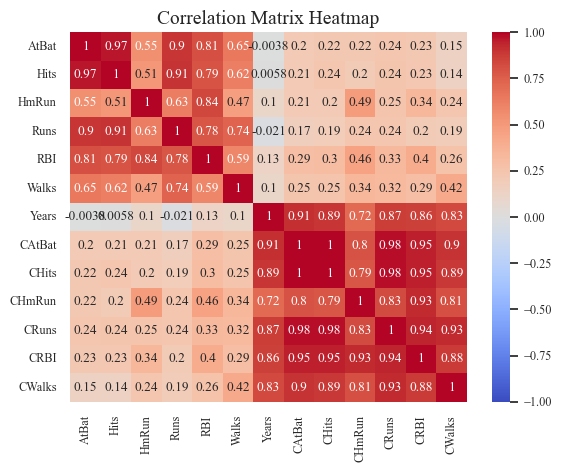

In [107]:
# Preparation: Calculate the correlation matrix
corr_matrix = Xtrain.corr()

# Plot the heatmap
plt = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.set_title("Correlation Matrix Heatmap", fontsize = 14)

In [51]:
# calculate PCA on a subset of the data
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(Xtrain[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks']])

PCA(n_components=6)

In [52]:
# glimpse at the principal components
print(pca.components_)

[[ 9.33688195e-01  2.78586444e-01  3.04354289e-02  1.49979152e-01
   1.33420382e-01  9.69272307e-02]
 [-1.97077045e-01 -2.42707387e-02  2.00708956e-01  3.58038483e-01
   4.06337428e-01  7.91824364e-01]
 [-8.84812068e-02  6.93185436e-02  3.08458272e-01 -3.64319926e-02
   8.04116342e-01 -4.94256136e-01]
 [-2.76177487e-01  8.08911360e-01 -8.34961852e-02  4.65045079e-01
  -1.44648099e-01 -1.58829456e-01]
 [ 7.26914249e-02 -4.86108785e-01  2.13258878e-01  7.66364774e-01
  -1.83545669e-01 -3.03201052e-01]
 [-1.45638440e-04  1.62345694e-01  9.00662052e-01 -2.10726167e-01
  -3.40402291e-01  4.66099277e-02]]


## 5.1 Plot explained variance

How large a share of the variance in the input variables do the consecutive Principal Components explain?

In [53]:
# Step 1: Calculate the percentage of variance explained by each component
explained_variance = pca.explained_variance_ratio_ * 100
explained_variance

array([9.67677112e+01, 1.41409811e+00, 9.27533473e-01, 5.87963545e-01,
       2.61499836e-01, 4.11938715e-02])

In [54]:
# Step 2: Create a DataFrame to store principal components and variance explained
pc_df = pd.DataFrame({
    'PC': np.arange(1, len(explained_variance) + 1),
    'percent': explained_variance
}).set_index('PC')
pc_df

,percent
PC,
1,96.767711
2,1.414098
3,0.927533
4,0.587964
5,0.261500
6,0.041194


So the first Principal Component explains 96.768% of the variation in 1986 performance indicators.

Text(0.5, 1.0, 'Variance explained by each principal component')

<Figure size 800x500 with 0 Axes>

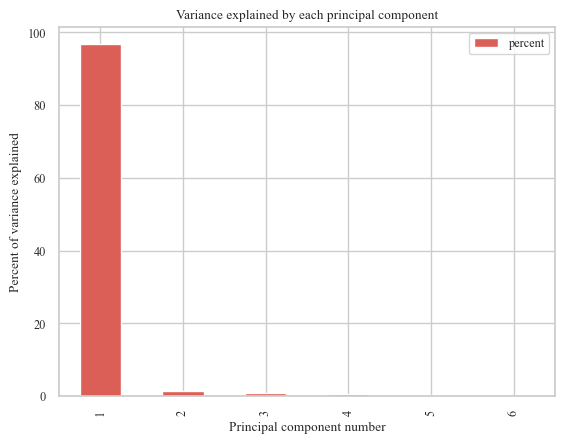

In [55]:
# Step 3: plot the data
plt.figure(figsize=(8, 5))
pc_df.plot.bar()
plt.xlabel('Principal component number')
plt.ylabel('Percent of variance explained')
plt.title('Variance explained by each principal component')

## 5.2 Plot the data along the Principal Components

Let's inspect the data along two strongest principal components. Color represents the number of Home Runs that year

In [56]:
# check the shape of the data
Xtrain[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks']].shape

(210, 6)

In [57]:
# Step 1: get a data frame with the Principal Components

# Calculate the Principal Components
pca_components = pca.fit_transform(Xtrain[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks']])
pca_components.shape

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df.shape


(210, 6)

In [58]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,120.588354,-3.287183,24.914553,-30.070246,-0.671066,5.143002
1,-121.269332,31.057183,-10.363786,-4.034588,-5.408712,-5.367112
2,83.002268,18.140966,-12.073031,-17.119200,-5.893836,2.308886
3,-170.203462,17.395942,-13.305058,-1.439564,0.845673,3.538999
4,-212.000237,6.632035,5.577311,-0.801485,-2.583957,2.864793
...,...,...,...,...,...,...
205,-152.220220,-5.154600,14.323687,15.248292,-1.665899,-3.805109
206,220.203024,38.073737,-27.585877,42.964108,-19.017132,-1.661524
207,-5.402008,1.340054,10.956718,14.237838,-6.876533,0.961833
208,-139.977557,-5.424852,-9.770566,1.462655,-7.481498,-0.248967


In [59]:
# Step 2: Merge Principal Components with riginal data

# Reset the index to ensure the data frames fit together
pca_df_reset = pca_df.reset_index(drop=True)
Xtrain_reset = Xtrain[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks']].reset_index(drop=True)

# concatenate with the reset indices
plot_data = pd.concat([pca_df_reset, Xtrain_reset], axis=1)
plot_data

,PC1,PC2,PC3,PC4,PC5,PC6,AtBat,Hits,HmRun,Runs,RBI,Walks
0,120.588354,-3.287183,24.914553,-30.070246,-0.671066,5.143002,512,117,29,54,88,43
1,-121.269332,31.057183,-10.363786,-4.034588,-5.408712,-5.367112,275,68,5,42,42,61
2,83.002268,18.140966,-12.073031,-17.119200,-5.893836,2.308886,472,116,16,60,62,74
3,-170.203462,17.395942,-13.305058,-1.439564,0.845673,3.538999,232,55,9,34,23,45
4,-212.000237,6.632035,5.577311,-0.801485,-2.583957,2.864793,193,47,10,21,29,24
...,...,...,...,...,...,...,...,...,...,...,...,...
205,-152.220220,-5.154600,14.323687,15.248292,-1.665899,-3.805109,246,76,5,35,39,13
206,220.203024,38.073737,-27.585877,42.964108,-19.017132,-1.661524,580,207,8,107,71,105
207,-5.402008,1.340054,10.956718,14.237838,-6.876533,0.961833,382,119,13,54,58,36
208,-139.977557,-5.424852,-9.770566,1.462655,-7.481498,-0.248967,263,70,1,26,23,30


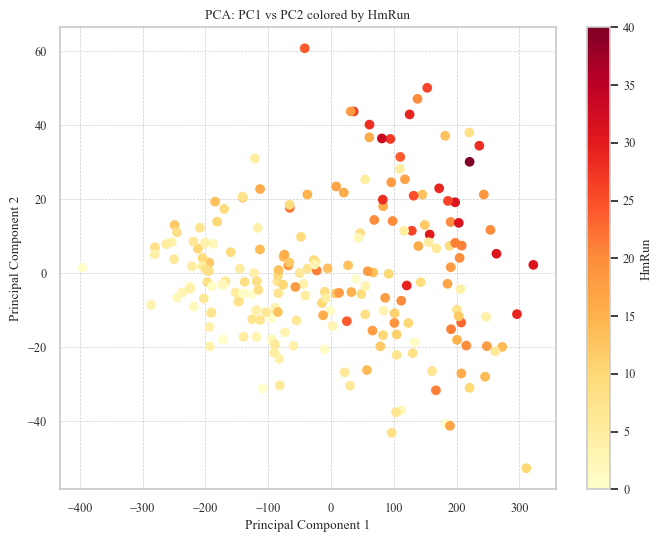

In [64]:
# Step 3: Create the scatter plot of PC1 vs PC2, colored by 'HmRun'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(plot_data['PC1'], plot_data['PC2'], c=plot_data['HmRun'], cmap='YlOrRd')

# add colorbar
plt.colorbar(scatter, label='HmRun')

# add labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2 colored by HmRun')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)


Remember: PC1 captures over 90% of the variation in the data; PC2 only captures much less. A high number of Home Runs loads on both components.

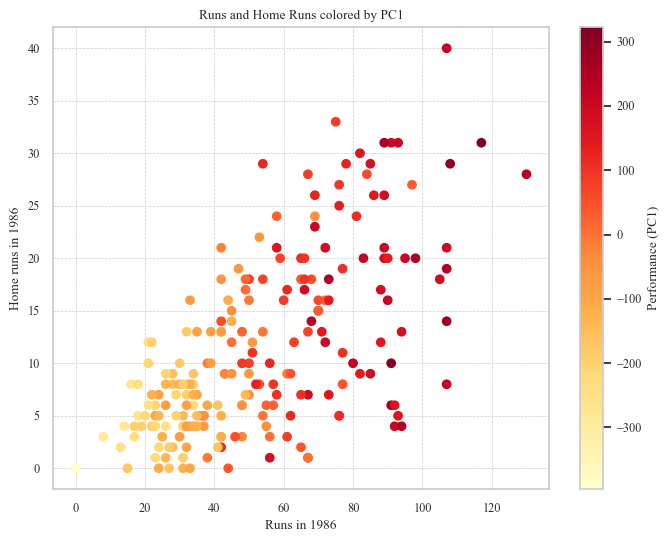

In [ ]:
# Alternatively: plot Runs and home Runs, and color by PC1
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x = plot_data['Runs'], y = plot_data['HmRun'], c=plot_data['PC1'], cmap='YlOrRd')

# add colorbar
plt.colorbar(scatter, label='Performance (PC1)')

# add labels
plt.xlabel('Runs in 1986')
plt.ylabel('Home runs in 1986')
plt.title('Runs and Home Runs colored by PC1')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

This plot is somewhat more intuitive: it shows that there is a strong (but not perfect) connection between the number of Runs and Home Runs a player scored in 1986. Some players scored many runs but few home runs, and overall performed relatively well. Those are the red points in the lower right part of the plot. Conversely, there are few players with few runs but many home runs. Players in the lower left section of the plot have both a low number of runs, and a low number home runs. The light color indicates low to mediocre performance. Players in the upper right have a high number of runs and a high number of home runs. The dark red color indicates strong perforamnce.

If runs and home runs were perfectly correlated (positively), they would form a diagonal from the lower left to the upper right corner.
If there was perfect negative correlation, they would form a diagonal from the upper left to the lower right.

## 5.3 Plot the loadings on the variables

How do the Principal Components reflect the different performance indicators? Let's inspect the variable loadings.

In [68]:
# Step 1: Get the loadings (the `components_` attribute contains the rotation matrix)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)], 
                        index=Xtrain[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks']].columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
AtBat,0.933688,-0.197077,-0.088481,-0.276177,0.072691,-0.000146
Hits,0.278586,-0.024271,0.069319,0.808911,-0.486109,0.162346
HmRun,0.030435,0.200709,0.308458,-0.083496,0.213259,0.900662
Runs,0.149979,0.358038,-0.036432,0.465045,0.766365,-0.210726
RBI,0.133420,0.406337,0.804116,-0.144648,-0.183546,-0.340402
Walks,0.096927,0.791824,-0.494256,-0.158829,-0.303201,0.046610


Text(1, -0.15, 'Data taken from ISLP package.')

<Figure size 800x500 with 0 Axes>

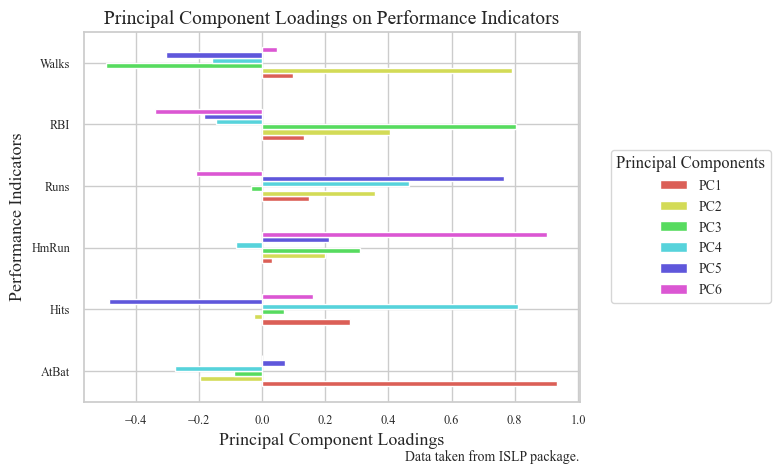

In [ ]:
# Step 2: plot the data
plt.figure(figsize=(8, 5))
loadings.plot.barh()
plt.title('Principal Component Loadings on Performance Indicators', fontsize = 14)
plt.xlabel('Principal Component Loadings', fontsize = 13)
plt.ylabel('Performance Indicators', fontsize = 13)
plt.legend(title='Principal Components', # there are various options for the legend
          loc = 'upper right', # location
          bbox_to_anchor=(1.4, 0.7),
          title_fontsize = 12, 
          fontsize = 10
          )
plt.text(1, -0.15, 'Data taken from ISLP package.',
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

The plot illustrates the the variable AtBat strongly loads on PC1, which in turn explains most of the variation in all the performance indicators. AtBat is thus the most important important performance indicator, followed by Hits, Runs, RBI, and Walks.